### 0. Нажмите Copy ↑

###1. Скачайте файл с данными: [trips_data.xlsx](https://drive.google.com/file/d/18Hyh1l9H3bR556W1tO2vKwpfAqZPueEp/view?usp=sharing)

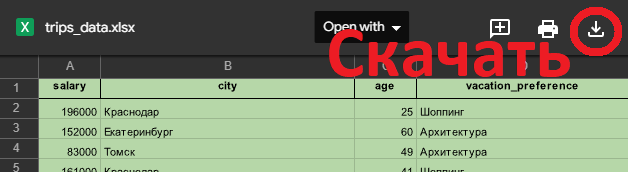

### 2. Загрузите в Colab

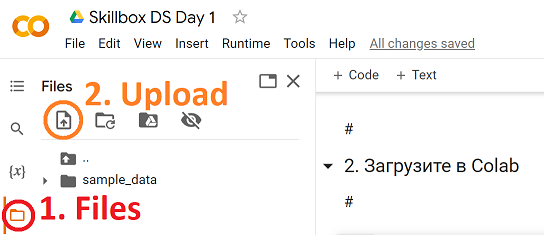

### Python Code:

SyntaxError - ошибка синтаксиса, нарушение правил языка


NameError - ошиблись в написании имени (переменной, фукнции, ...) 

In [1]:
print("Hello Skillbox, Python is very good")
# Запустить код: Shift+Enter

Hello Skillbox, Python is very good


In [2]:
import pandas
# Pandas - библиотека для обработки данных (табличных)
# import - указание подключить инструмент

# read_excel - чтение Excel файлов
# trips_data - переменная с содержимым файла
trips_data = pandas.read_excel("trips_data.xlsx")

In [3]:
trips_data

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney
...,...,...,...,...,...,...,...
995,81000,Краснодар,55,Пляжный отдых,Морской транспорт,2,Paris
996,96000,Краснодар,32,Архитектура,Поезд,1,Paris
997,56000,Краснодар,68,Архитектура,Самолет,2,Paris
998,162000,Краснодар,69,Архитектура,Самолет,0,Sydney


In [4]:
# Переменная.НазваниеКолонки
# Датафрейм = Таблица = trips_data
# Series = Колонка = salary
trips_data.salary

0      196000
1      152000
2       83000
3      161000
4      146000
        ...  
995     81000
996     96000
997     56000
998    162000
999    171000
Name: salary, Length: 1000, dtype: int64

<AxesSubplot: >

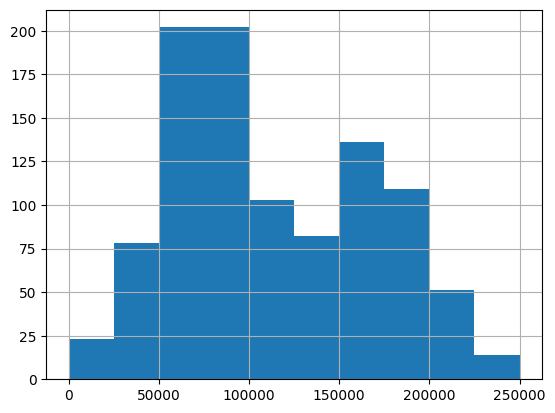

In [5]:
# hist - гистограмма
trips_data.salary.hist()

<AxesSubplot: >

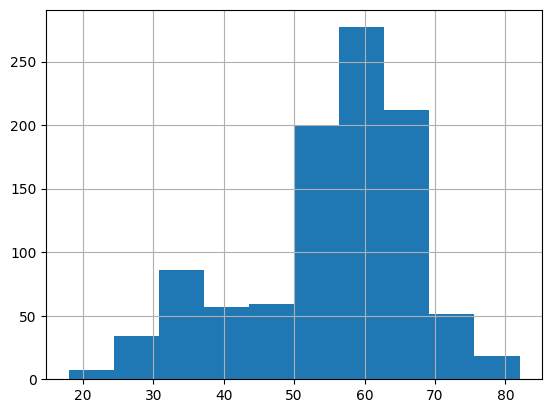

In [6]:
trips_data.age.hist()

<AxesSubplot: >

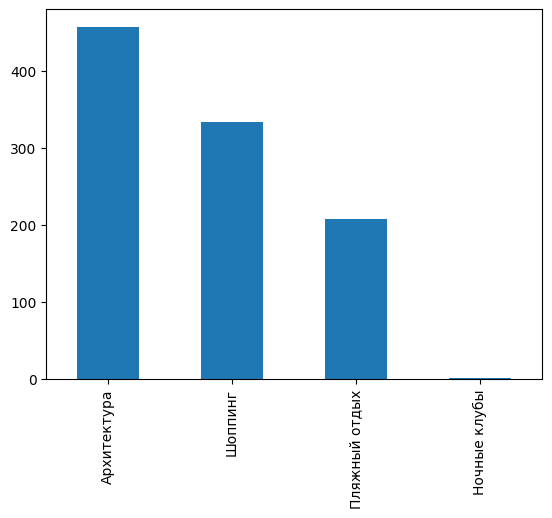

In [7]:
trips_data.vacation_preference.value_counts().plot(kind='bar')

<AxesSubplot: >

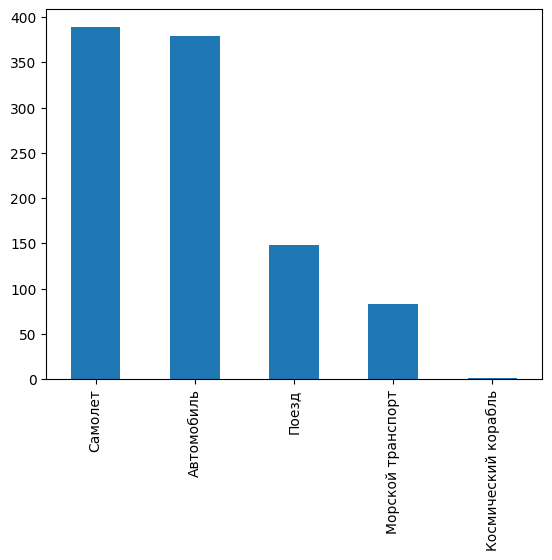

In [8]:
trips_data.transport_preference.value_counts().plot(kind='bar')

<AxesSubplot: >

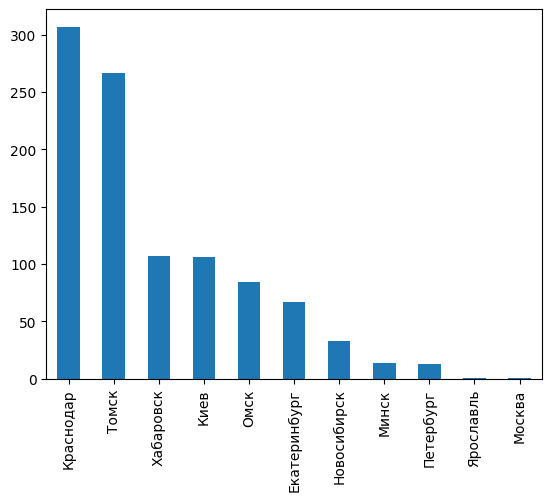

In [9]:
trips_data.city.value_counts().plot(kind='bar')

In [10]:
# Научить модель машинного обучения рекомендовать назначение(город) для путешественников
# Табличка 1000 примеров => извлечь концентрированные знания
# Задача модели МО => найти закономерности в данных
# Разные модели делают это как умеют (Линейная Регрессия, Деревьев Решений)
# Классификация - задача выбора наиболее вероятного варианта из предложенных
# Приходит новый клиент => модель смотрит на его данные => в итоге классифицирует клиента как "путешественника в Нью-Йорк"

In [11]:
# value_counts - считает количество вхождений
trips_data.target.value_counts()

Paris       203
New York    201
London      199
Tokio       199
Sydney      198
Name: target, dtype: int64

In [12]:
# Подготовка данных
# X - входные данные, на основе которых можно сделать предсказание (salary, age, city...)
# y - выходные - само предсказание (target)

# Задача модели - найти закономерность между X и y
# y = f(X)

# Задача предсказания цены дома
# Цена, Площадь

# 100 000, 50
# 300 000, 152
# 500 000, 258

# Средняя цена за м^2 = 1970
# 500кв.м. * 1970 = 

# y = X * 1970

In [13]:
# Все колонки, кроме target
# drop - выкинуть, axis=1 колонку
X = trips_data.drop("target", axis=1)
y = trips_data.target

In [14]:
print(X.shape)
print(y.shape)

(1000, 6)
(1000,)


In [16]:
X

,salary,city,age,vacation_preference,transport_preference,family_members
0,196000,Краснодар,25,Шоппинг,Автомобиль,1
1,152000,Екатеринбург,60,Архитектура,Самолет,1
2,83000,Томск,49,Архитектура,Автомобиль,2
3,161000,Краснодар,41,Шоппинг,Автомобиль,0
4,146000,Краснодар,58,Архитектура,Самолет,1
...,...,...,...,...,...,...
995,81000,Краснодар,55,Пляжный отдых,Морской транспорт,2
996,96000,Краснодар,32,Архитектура,Поезд,1
997,56000,Краснодар,68,Архитектура,Самолет,2
998,162000,Краснодар,69,Архитектура,Самолет,0


In [17]:
X_dummies = pandas.get_dummies(X, columns=["city", "vacation_preference", "transport_preference"])

In [18]:
print(X_dummies.shape)

(1000, 23)


In [19]:
# Задачи DS: Выбрать алгоритм, выбрать настройки, померить качество модели, насколько можно верить
# Много экспериментов

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier() # создаем модель
model.fit(X_dummies, y) # fit - "обучить", "найти закомерности", "подстроиться"
# X => model => y

RandomForestClassifier()

In [20]:
# Как сделать прогноз:
# model.predict
# model.predict_proba 

In [21]:
# Поверхностная оценка качества (accuracy / train dataset)
# Насколько модель хорошо делает предсказания на тренирочная
model.score(X_dummies, y)

0.999

In [22]:
{col:[0] for col in X_dummies.columns}

{'salary': [0],
 'age': [0],
 'family_members': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0]}

In [23]:
example = {'salary': [1900000],
 'age': [24],
 'family_members': [2],
 'city_Екатеринбург': [1],
 'city_Киев': [0],
 'city_Краснодар': [1],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [1],
 'transport_preference_Автомобиль': [1],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0]}

example_df = pandas.DataFrame(example, columns=X_dummies.columns)
model.predict(example_df)

array(['New York'], dtype=object)

In [24]:
print(model.classes_)
print(model.predict_proba(example_df))

['London' 'New York' 'Paris' 'Sydney' 'Tokio']
[[0.01 0.67 0.04 0.07 0.21]]


In [25]:
# Confusion Matrix?

# День2

## Разбор ДЗ

1.   Самых взрослых людей в каждом городе
2.   У кого из любителей Самолетов  больше членов семьи
3.   Кто предпочитает Архитектуру, люди с высокой зарплатой или с низкой
4.   Какой диапазон возрастов (20-30, 30-40, 40-50, 50-60, 60-70, 70-80) имеет самую высокую среднюю зарплату



In [ ]:
trips_data.transport_preference == 'Самолет'

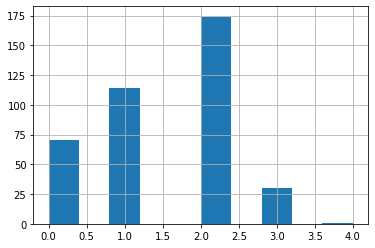

In [ ]:
trips_data[trips_data.transport_preference == 'Самолет'].family_members.hist()

In [ ]:
trips_data.groupby("city")["salary"].mean()

city
Екатеринбург    169880.597015
Киев            101962.264151
Краснодар        94524.429967
Минск           107500.000000
Москва          206000.000000
Новосибирск     173212.121212
Омск            150690.476190
Петербург       189538.461538
Томск            97722.846442
Хабаровск       112644.859813
Ярославль        32000.000000
Name: salary, dtype: float64

In [ ]:
trips_data.groupby("city")["age"].max()

city
Екатеринбург    74.0
Киев            81.0
Краснодар       78.0
Минск           78.0
Москва          75.0
Новосибирск     76.0
Омск            80.0
Петербург       76.0
Томск           82.0
Хабаровск       82.0
Ярославль       67.0
Name: age, dtype: float64

In [ ]:
trips_data["age"] // 10  # Целочисленное деление

In [ ]:
trips_data["age_band"] = (trips_data["age"] // 10).astype(int)  # Диапазон возраста
trips_data.head()

,salary,city,age,vacation_preference,transport_preference,family_members,target,age_band
0,196000.0,Краснодар,25.0,Шоппинг,Автомобиль,1.0,New York,2
1,152000.0,Екатеринбург,60.0,Архитектура,Самолет,1.0,London,6
2,83000.0,Томск,49.0,Архитектура,Автомобиль,2.0,Sydney,4
3,161000.0,Краснодар,41.0,Шоппинг,Автомобиль,0.0,New York,4
4,146000.0,Краснодар,58.0,Архитектура,Самолет,1.0,Sydney,5


In [ ]:
trips_data.groupby("age_band")["salary"].mean()

age_band
1    224000.000000
2    174606.060606
3    115286.956522
4    111734.042553
5    102087.878788
6    113695.530726
7    113906.250000
8    101200.000000
Name: salary, dtype: float64

##**Сегодня в программе:**
*   Временные ряды
*   Matplotlib, Pandas, sklearn
*   Feature Engineering
*   Метрики оценки модели
*   Важность Фич




**Нам понадобятся данные**

Скачайте их здесь:

[Google Drive](https://drive.google.com/file/d/17Be7imiZ6dwsWPACCeuxBDMRm0s9Whaz/view?usp=sharing) / [Yandex Disk](https://disk.yandex.com/d/UOE68m01XuMLzg)



`Источник: https://www.cryptodatadownload.com/data/bitfinex/`

In [ ]:
import pandas as pd

bitcoin = pd.read_csv("/content/BTCUSD_daily.csv", index_col = 0, parse_dates=['date'])

In [ ]:
bitcoin.head()

,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11


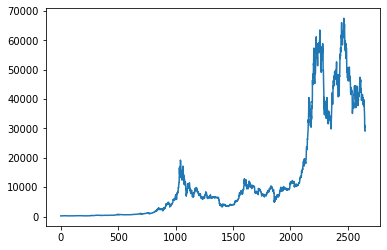

In [ ]:
bitcoin.open.plot()

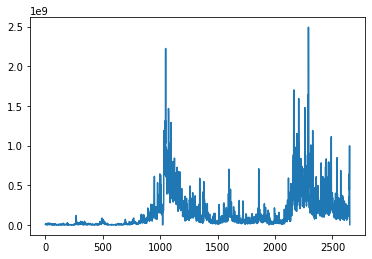

In [ ]:
bitcoin["Volume USD"].plot()

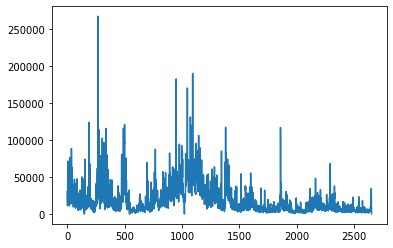

In [ ]:
bitcoin["Volume BTC"].plot()

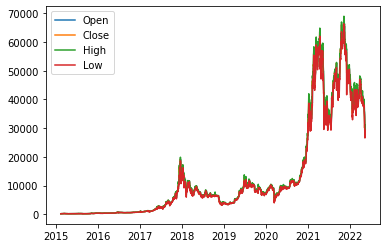

In [ ]:
import matplotlib.pyplot as plt

plt.plot(bitcoin.date, bitcoin.open, label="Open")
plt.plot(bitcoin.date, bitcoin.close, label="Close")
plt.plot(bitcoin.date, bitcoin.high, label="High")
plt.plot(bitcoin.date, bitcoin.low, label="Low")
plt.legend()
plt.show()

In [ ]:
# Feature Engineering - создание новых Фич, на основе существующих, в надежде что это поможет модели

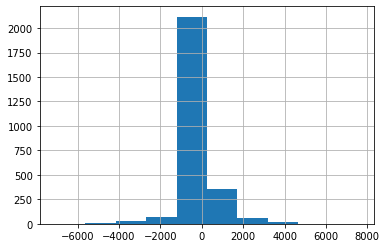

In [ ]:
(bitcoin.close - bitcoin.open).hist()

In [ ]:
bitcoin["hl_co_abs"] = ((bitcoin.high - bitcoin.low) / (bitcoin.close - bitcoin.open)).abs()

In [ ]:
# Скользящее окно
# rolling(window=)


bitcoin["open_mean_7d"] = bitcoin.open.shift(1).rolling(window=7).mean()
bitcoin["max_close_14d"] = bitcoin.close.shift(1).rolling(window=14).max()
bitcoin["min_close_14d"] = bitcoin.close.shift(1).rolling(window=14).min()
bitcoin.head(20)

,date,symbol,open,high,low,close,Volume USD,Volume BTC,hl_co_abs,open_mean_7d,max_close_14d,min_close_14d
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03,2.659280,NaN,NaN,NaN
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95,28.228571,NaN,NaN,NaN
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28,3.559322,NaN,NaN,NaN
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65,1.563050,NaN,NaN,NaN
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11,1.491550,NaN,NaN,NaN
5,2015-02-14,BTC/USD,236.13,261.30,235.51,258.12,10739014.48,42984.94,1.172806,NaN,NaN,NaN
6,2015-02-15,BTC/USD,257.00,266.84,228.20,234.14,17384420.70,71361.28,1.690289,NaN,NaN,NaN
7,2015-02-16,BTC/USD,234.14,243.65,228.62,236.78,10798751.12,45750.85,5.693182,228.642857,NaN,NaN
8,2015-02-17,BTC/USD,236.78,246.28,231.50,242.87,10228035.45,42669.08,2.426929,230.060000,NaN,NaN
9,2015-02-18,BTC/USD,242.87,244.99,231.01,234.80,9164141.83,38588.38,1.732342,232.370000,NaN,NaN


In [ ]:
# jan22 = bitcoin[bitcoin.date.between("2022-01-01", "2022-02-01")]
# plt.plot(jan22.date, jan22.open)

In [ ]:
# Задача: Предсказать курс (close) за след. день
# Добавить 7 колонок: цена close за 1 день назад (2,3,4,6,7 дней назад)

for day in range(1,8):
    name = f"close_{day}d"
    bitcoin[name] = bitcoin["close"].shift(day)

In [ ]:
# Изменение датафреймов в Pandas:
# inplace=False # по-умолчанию = текущая ДФ не будет изменен, 
# вместо этого Pandas вернет новый ДФ, содержащий изменение

# inplace=True # изменить Здесь и Сейчас = текущий ДФ будет изменен
bitcoin.drop("symbol", axis=1, inplace=True, errors="ignore")

In [ ]:
bitcoin["month"] = bitcoin["date"].dt.month
bitcoin["year"] = bitcoin["date"].dt.year

In [ ]:
bitcoin.drop("date", axis=1, inplace=True, errors="ignore")

In [ ]:
# Избавиться от NaN = Not A Number / None / "null"

# dropna = Удалить все пропуски (удалить все строки, содержащие пропуск)
# fillna = Заполнить все пропуск (вперед / назад)
# interpolate
bitcoin.replace([np.inf, -np.inf], np.nan, inplace=True)
bitcoin.fillna(method="backfill", inplace=True)

In [ ]:
# X = Вход, y=Выход
# X=данные за текущий день, y=close за след. день


# target = close на завтра
bitcoin["target"] = bitcoin.close.shift(-1)

# Отрезать последнюю строчку
# [:-1]  =  все, кроме последней строки

X = bitcoin[:-1].drop("target", axis=1)
y = bitcoin[:-1].target
# train / test

In [ ]:
print(X.shape, y.shape)

(2651, 19) (2651,)


In [ ]:
# Train = модель обучается = учебник = (X_train, y_train)
# Test = проверяем модель = экзамен = X_test => y_pred ?=? y_test

# Metric = средняя абсолютная ошибка, макс. ошибка


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1776, 19)
(875, 19)
(1776,)
(875,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Mean Absolute Error
(y_pred - y_test).abs().mean()

401.770497947261

In [ ]:
(y_pred - y_test).abs().max()

7394.640684226259

In [ ]:
from sklearn.metrics import mean_absolute_error, max_error
print("MAE = ", mean_absolute_error(y_pred, y_test))
print("MAX = ", max_error(y_pred, y_test))

MAE =  401.770497947261
MAX =  7394.640684226259


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MAE = ", mean_absolute_error(y_pred, y_test))
print("MAX = ", max_error(y_pred, y_test))

MAE =  475.13654426238304
MAX =  7961.019839308632


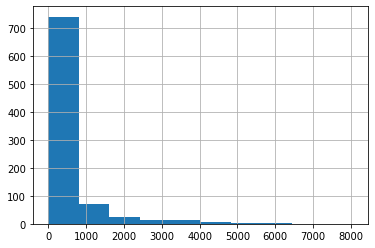

In [ ]:
(y_pred - y_test).abs().hist()